In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf
import matplotlib.mlab as mlab
import scipy.integrate as integrate
import matplotlib.patches as mpatches
import pylab as P
from scipy.optimize import minimize
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# 1.a

**Ans**: Yes the above method is expected to control FDR in the current setting because the generated symbols \hat{X}_i's are 'knockoffs' of the of original distribution.

# 1.b (i)

In [14]:
def generatedata1(n,frac=0.8):
    rv = np.random.normal(scale=1.0, size=n)
    rv[n*frac:] += 5
    return(rv)

def generatedata2(n,frac=0.8):
    rv = np.random.normal(scale=1.0, size=n)
    rv[n*frac:] += 2
    return(rv)

def generatecontrol(n):
    rv = np.random.normal(scale=1.0, size=n)
    return(rv)

def min_t(t, data, control, q):
    V = np.where( (np.abs(control)>np.abs(data)) & (np.abs(control)>t))
    R = np.where( (np.abs(control)<np.abs(data)) & (np.abs(data)>t))
    return( (V[0].shape[0]+0.0)/(R[0].shape[0]+0.0) < q ), R, V

def p_from_z(array):
    return(0.5 - 0.5*erf(array))

n = 1000
data    = generatedata1(n)
control = generatecontrol(n)
q_arr = [.01,.05,0.1,0.2,0.3,0.4,0.5]
q_arr = [.01,.05,]#0.1,0.2,0.3,0.4,0.5]
q_true = np.zeros_like(q_arr)
q_bh = np.zeros_like(q_arr)
power_method = np.zeros_like(q_arr)
power_bh = np.zeros_like(q_arr)
for i,q in enumerate(q_arr):
    t_array = np.concatenate([ np.abs(data), np.abs(control)] )
    t_array.sort()
    
    #Method 1.a
    for t in t_array:
        answer, R, V = min_t(t, data, control, q)
        if answer:
            break
    V_true    = np.where(R[0]<n*.8)
    q_true[i] = (V_true[0].shape[0]+0.0)/(R[0].shape[0]+0.0)
    power_method[i]  = R[0].shape[0]
    
    #BH Method
    pvals = p_from_z(data)
    answer = multipletests(pvals, alpha=q, method='fdr_bh', is_sorted=False, returnsorted=False)
    R = np.where(answer[0]==True)[0]
    V = np.where(R<n*.8)
    q_bh[i] = (V[0].shape[0]+0.0)/(R.shape[0]+0.0)

    
# #(The 1+1/2..1/n factor)
# for i in range(10):
#     if sorted(Data)[i] < ((i+1)*alpha)/(n):
#         index = np.where(Data == sorted(Data)[i])[0][0]
#         p = "%.4f" % Data[index]
#         print('Reject hypothesis',index,'with p value', p,((i+1)*alpha)/(10))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


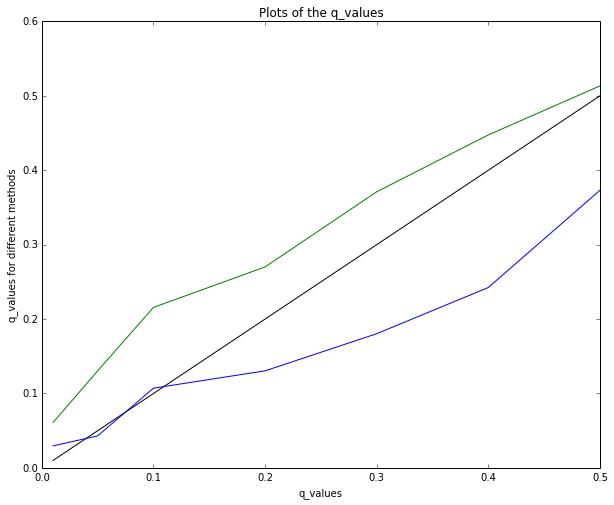

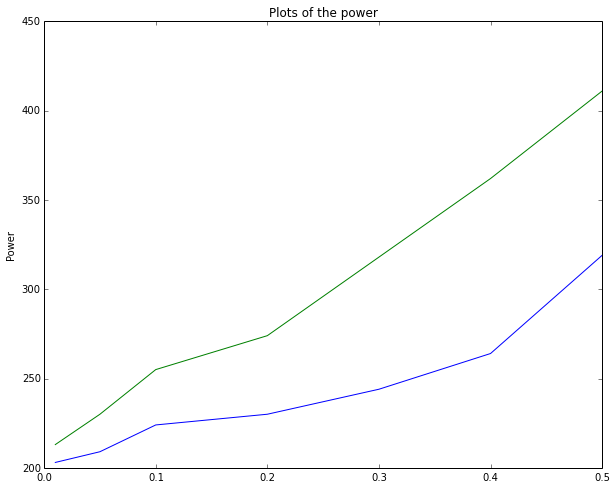

In [10]:

frac = 0.8
n = 1000
data    = generatedata1(n)
control = generatecontrol(n)
q_arr = [.01,.05,0.1,0.2,0.3,0.4,0.5]
# q_arr = [.01,.05,]#0.1,0.2,0.3,0.4,0.5]
q_true = np.zeros_like(q_arr)
q_bh = np.zeros_like(q_arr)
power_method = np.zeros_like(q_arr)
power_bh = np.zeros_like(q_arr)
for i,q in enumerate(q_arr):
    t_array = np.concatenate([ np.abs(data), np.abs(control)] )
    t_array.sort()
    
    #Method 1.a
    for t in t_array:
        answer, R, V = min_t(t, data, control, q)
        if answer:
            break
    V_true    = np.where(R[0]<n*.8)
    q_true[i] = (V_true[0].shape[0]+0.0)/(R[0].shape[0]+0.0)
    power_method[i]  = R[0].shape[0]
    
    #BH Method
    pvals = p_from_z(data)
    answer = multipletests(pvals, alpha=q, method='fdr_bh', is_sorted=False, returnsorted=False)
    R = np.where(answer[0]==True)[0]
    V = np.where(R<n*.8)[0]
    q_bh[i] = (V.shape[0]+0.0)/(R.shape[0]+0.0)
    power_bh[i]  = R.shape[0]

plt.plot(q_arr,q_arr,color='black')
plt.plot(q_arr,q_true,color='blue')
plt.plot(q_arr,q_bh,color='green')
plt.title('Plots of the q_values ')
plt.ylabel('q_values for different methods')
plt.xlabel('q_values')

plt.figure()
plt.plot(q_arr,power_bh,color='green')
plt.plot(q_arr,power_method,color='blue')
plt.title('Plots of the power ')
plt.ylabel('Power')

# 1.b(ii)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


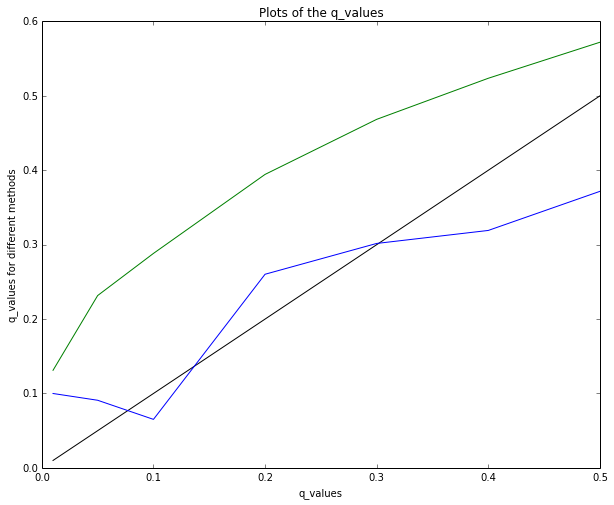

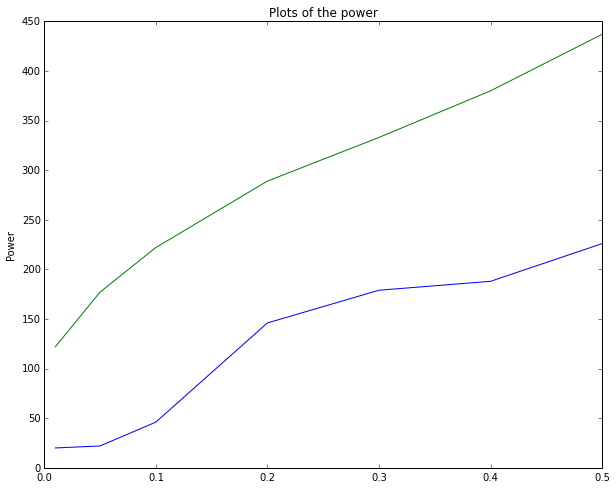

In [11]:

frac = 0.8
n = 1000
data    = generatedata2(n)
control = generatecontrol(n)
q_arr = [.01,.05,0.1,0.2,0.3,0.4,0.5]
# q_arr = [.01,.05,]#0.1,0.2,0.3,0.4,0.5]
q_true = np.zeros_like(q_arr)
q_bh = np.zeros_like(q_arr)
power_method = np.zeros_like(q_arr)
power_bh = np.zeros_like(q_arr)
for i,q in enumerate(q_arr):
    t_array = np.concatenate([ np.abs(data), np.abs(control)] )
    t_array.sort()
    
    #Method 1.a
    for t in t_array:
        answer, R, V = min_t(t, data, control, q)
        if answer:
            break
    V_true    = np.where(R[0]<n*.8)
    q_true[i] = (V_true[0].shape[0]+0.0)/(R[0].shape[0]+0.0)
    power_method[i]  = R[0].shape[0]
    
    #BH Method
    pvals = p_from_z(data)
    answer = multipletests(pvals, alpha=q, method='fdr_bh', is_sorted=False, returnsorted=False)
    R = np.where(answer[0]==True)[0]
    V = np.where(R<n*.8)[0]
    q_bh[i] = (V.shape[0]+0.0)/(R.shape[0]+0.0)
    power_bh[i]  = R.shape[0]

plt.plot(q_arr,q_arr,color='black')
plt.plot(q_arr,q_true,color='blue')
plt.plot(q_arr,q_bh,color='green')
plt.title('Plots of the q_values ')
plt.ylabel('q_values for different methods')
plt.xlabel('q_values')

plt.figure()
plt.plot(q_arr,power_bh,color='green')
plt.plot(q_arr,power_method,color='blue')
plt.title('Plots of the power ')
plt.ylabel('Power')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


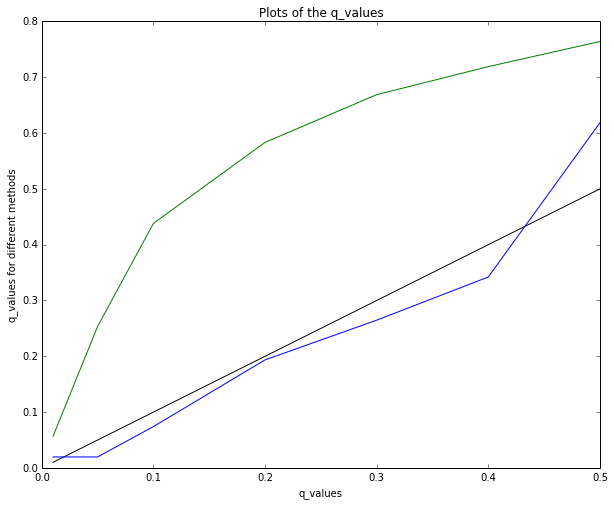

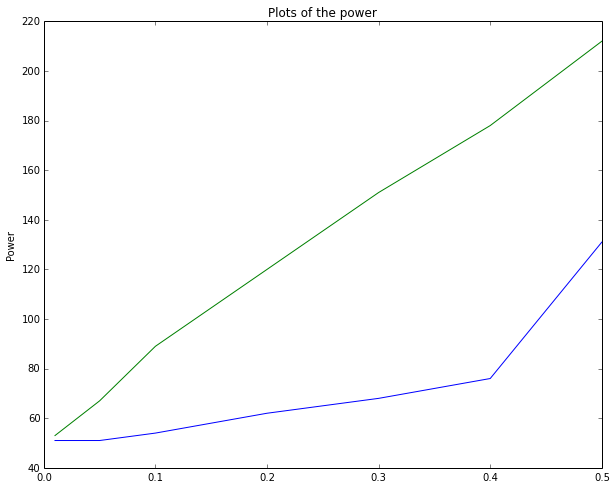

In [15]:

frac = 0.95
n = 1000
data    = generatedata1(n,frac)
control = generatecontrol(n)
q_arr = [.01,.05,0.1,0.2,0.3,0.4,0.5]
# q_arr = [.01,.05,]#0.1,0.2,0.3,0.4,0.5]
q_true = np.zeros_like(q_arr)
q_bh = np.zeros_like(q_arr)
power_method = np.zeros_like(q_arr)
power_bh = np.zeros_like(q_arr)
for i,q in enumerate(q_arr):
    t_array = np.concatenate([ np.abs(data), np.abs(control)] )
    t_array.sort()
    
    #Method 1.a
    for t in t_array:
        answer, R, V = min_t(t, data, control, q)
        if answer:
            break
    V_true    = np.where(R[0]<n*frac)
    q_true[i] = (V_true[0].shape[0]+0.0)/(R[0].shape[0]+0.0)
    power_method[i]  = R[0].shape[0]
    
    #BH Method
    pvals = p_from_z(data)
    answer = multipletests(pvals, alpha=q, method='fdr_bh', is_sorted=False, returnsorted=False)
    R = np.where(answer[0]==True)[0]
    V = np.where(R<n*frac)[0]
    q_bh[i] = (V.shape[0]+0.0)/(R.shape[0]+0.0)
    power_bh[i]  = R.shape[0]

plt.plot(q_arr,q_arr,color='black')
plt.plot(q_arr,q_true,color='blue')
plt.plot(q_arr,q_bh,color='green')
plt.title('Plots of the q_values ')
plt.ylabel('q_values for different methods')
plt.xlabel('q_values')

plt.figure()
plt.plot(q_arr,power_bh,color='green')
plt.plot(q_arr,power_method,color='blue')
plt.title('Plots of the power ')
plt.ylabel('Power')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


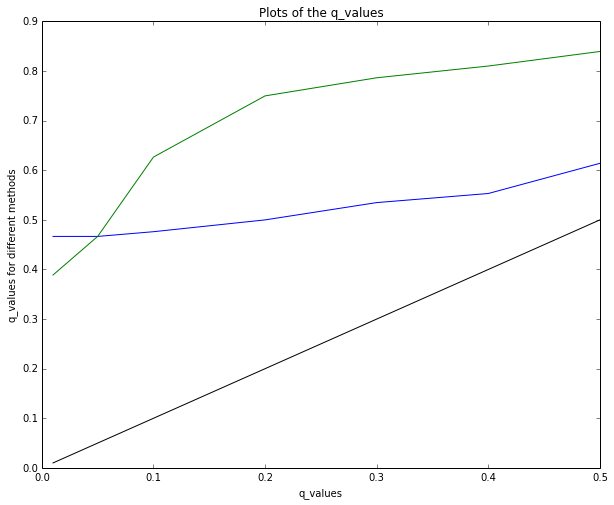

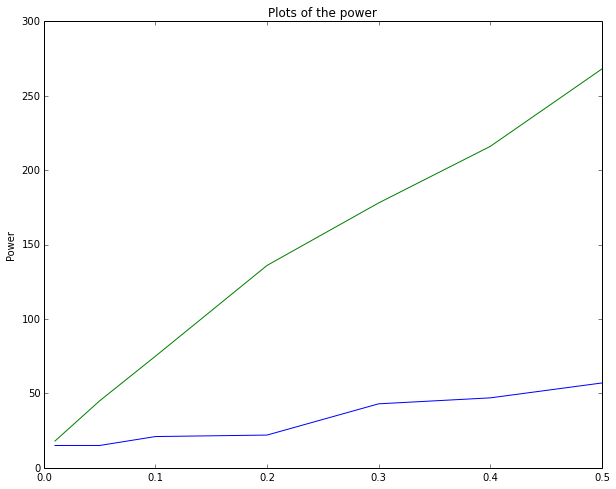

# Comments

1.b 

The knockoff method performs better than the BH method - The black line in the q_value graph is the expected value of FDR. We see that the blue line(knockoff) is closer (and lower) to the black line, whereas the green line is far (and above) from the black line.
This might be because the variance of FDR might be higher than variance of knockoff.

1.c

When the alternate hypothesis are '5 away' from null, knockoff performs decently (although worse than 1.b). But BH procedure has bad performance

However, when the alternate hypothesis are only '2 away' from null, both knockoff & BH procedure have bad performances. **Reason** The number of non-nulls has decreased and hence the signal/noise ratio has decreased.